In [1]:
from sklearn.datasets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image


def plot_2Ddata_with_boundary(predict,X,y):
    n = 200
    mins,maxs = np.min(X,axis=0), np.max(X,axis=0)
    mins -= np.abs(mins)*.2
    maxs += np.abs(maxs)*.2
    d0 = np.linspace(mins[0], maxs[0],n)
    d1 = np.linspace(mins[1], maxs[1],n)
    gd0,gd1 = np.meshgrid(d0,d1)
    D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
    p = (predict(D)*1.).reshape((n,n))
    plt.contourf(gd0,gd1,p, levels=[-0.1,0.5], alpha=0.5, cmap=plt.cm.Greys)
    plt.scatter(X[y==0][:,0], X[y==0][:,1], c="blue")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], c="red")
    
def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("/tmp/dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    !dot -Tpng /tmp/dt.dot -o /tmp/dt.png
    
hasdot = !which dot
if len(hasdot)==0:
    print "Installing Graphviz for tree visualization"
    !sudo apt-get update
    !sudo apt-get install -y graphviz

## Observa cómo funciona un árbol de decisión

cambia el parámetro `max_deph` a 1, a 3 o a más y observa el árbol de decisión que se genera

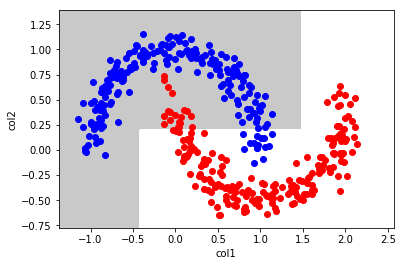

In [2]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1)
dt = DecisionTreeClassifier(max_depth=2); dt.fit(X,y)
plot_2Ddata_with_boundary(dt.predict, X,y)
plt.xlabel("col1"); plt.ylabel("col2");

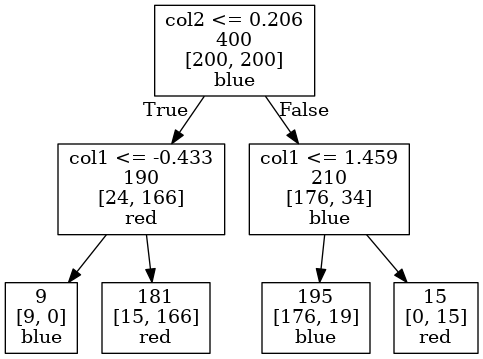

In [3]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=300)

### Observa las fronteras de clasificación de

- DecisionTree con max_depth=1
- LogisticRegression
- SVM polinomial de grado 2

y observa también los scores respectivos

/opt/miniconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


decision tree       0.8174999999999999
logistic regression 0.8775000000000001
poly svm degree 2   0.7775000000000001


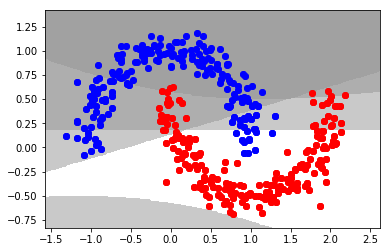

In [4]:
X,y = make_moons(400, noise=0.1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

dt = DecisionTreeClassifier(max_depth=1); dt.fit(X,y)
lr = LogisticRegression(); lr.fit(X,y)
sv = SVC(kernel="poly", degree=2); sv.fit(X,y)
print "decision tree      ", np.mean(cross_val_score(dt, X,y, cv=10))
print "logistic regression", np.mean(cross_val_score(lr, X,y, cv=10))
print "poly svm degree 2  ", np.mean(cross_val_score(sv, X,y, cv=10))
plot_2Ddata_with_boundary(dt.predict, X,y)
plot_2Ddata_with_boundary(lr.predict, X,y)
plot_2Ddata_with_boundary(sv.predict, X,y)

### Clasificador combinado por votación

In [5]:
class VotingClassifier:
    
    def __init__(self):
        self._estimators = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel="poly", degree=2)]
        
    def fit(self, X,y):
        for estimator in self._estimators:
            estimator.fit(X,y)
            
    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for estimator in self._estimators:
            preds += estimator.predict(X)
            
        preds = (preds>(len(self._estimators)/2.)).astype(int)
        return preds
    
    def score(self, X,y):
        return np.sum(self.predict(X)==y)*1./len(X)
    
    def get_params(self, deep=None):
        return dict()
    

ensemble score 0.93


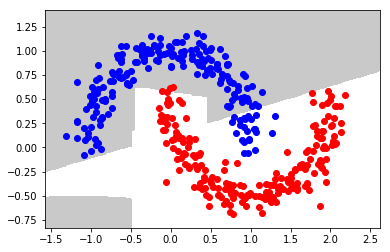

In [6]:
vc = VotingClassifier()
vc.fit(X,y)
print "ensemble score", np.mean(cross_val_score(vc, X,y, cv=10))
plot_2Ddata_with_boundary(vc.predict, X,y)